Using this data with laptop specs and prices, I will engineer features to predict the pricing based on the specs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

In [2]:
df = pd.read_csv('laptops.csv')

In [3]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
Unnamed: 0          1303 non-null int64
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price_euros         1303 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.4+ KB


# clean the data & engineer features

In [5]:
# new dataframe for features
features = pd.DataFrame()

## Unnamed: 0 

this column is not needed

## Company

In [6]:
df.Company.value_counts()

Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
LG             3
Chuwi          3
Google         3
Fujitsu        3
Huawei         2
Name: Company, dtype: int64

In [7]:
(297+297+274+158)/len(df)

0.7874136607828089

* the top 4 Companys makeup more than 75% of all laptops
* the bottom 15 make up fewer than 25%

In [8]:
df.groupby('Company').aggregate(np.mean).sort_values('Price_euros')

,Unnamed: 0,Inches,Price_euros
Company,,,
Vero,796.250000,13.825000,217.425000
Mediacom,581.000000,13.457143,295.000000
Chuwi,316.333333,14.500000,314.296667
Acer,585.087379,15.063107,626.775825
Fujitsu,733.666667,15.600000,729.000000
HP,703.722628,14.943066,1067.774854
Lenovo,682.471380,14.872727,1086.384444
Asus,614.765823,15.450000,1104.169367
Xiaomi,448.250000,14.450000,1133.462500


* the top 4 companies, which make up 75% of the totals, share similar mean pricing 

* the companies where mean price is very different, account for only a small amount of the totals

* **do not use Company as a feature**

## Product

In [9]:
df.Product.value_counts()

XPS 13                                         30
Inspiron 3567                                  29
250 G6                                         21
Legion Y520-15IKBN                             19
Vostro 3568                                    19
ProBook 450                                    18
Inspiron 5570                                  18
Alienware 17                                   15
Inspiron 5567                                  14
Satellite Pro                                  13
Aspire 3                                       12
Latitude 5580                                  12
ThinkPad X1                                    12
EliteBook 840                                  12
EliteBook 850                                  10
MacBook Pro                                    10
Inspiron 7567                                  10
EliteBook 820                                   9
Inspiron 3552                                   9
XPS 15                                          9


* **there are too many categories of Product to be a feature**

## TypeName

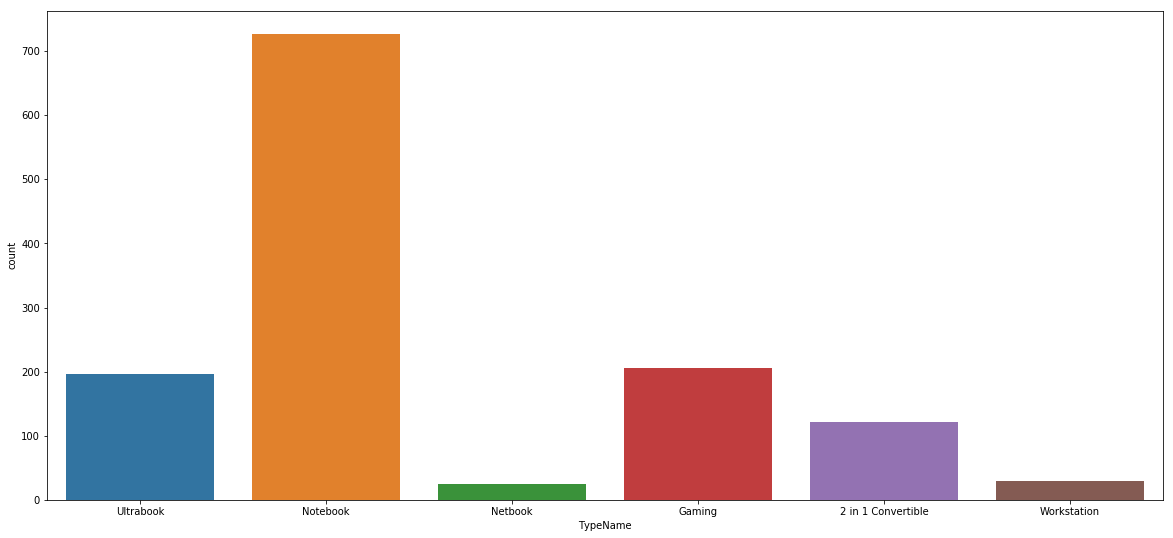

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [10]:
plt.figure(figsize=(20,9))
sns.countplot(x='TypeName',data=df)
plt.show()
df.TypeName.value_counts()

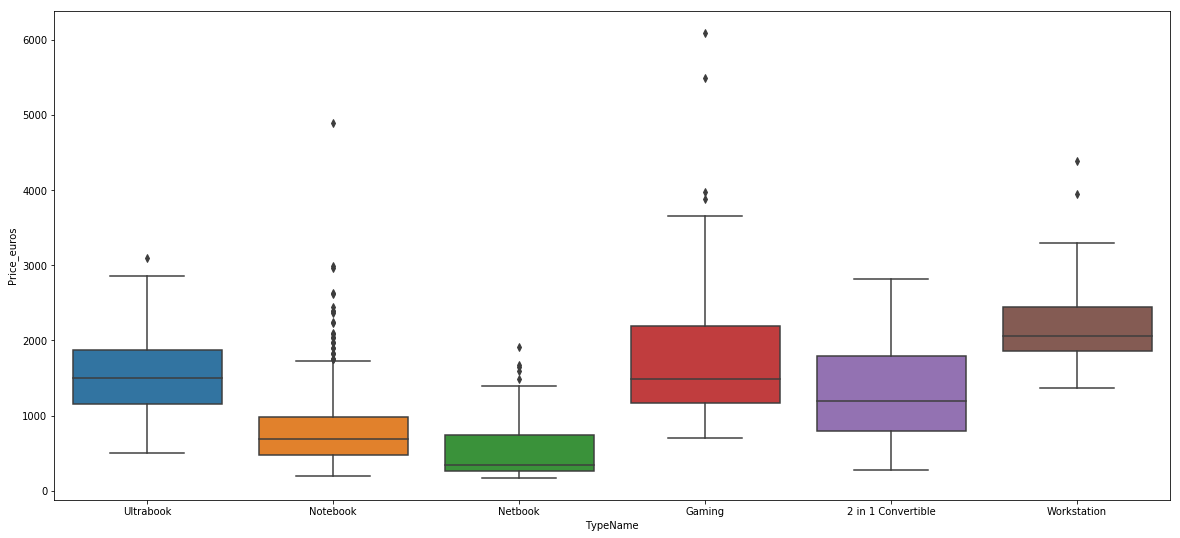

,Unnamed: 0,Inches,Price_euros
TypeName,,,
2 in 1 Convertible,739.024793,13.614876,1282.401653
Gaming,688.712195,16.345854,1731.380634
Netbook,820.560000,11.816000,636.232000
Notebook,643.276479,15.330536,782.078624
Ultrabook,623.311224,13.601020,1548.230357
Workstation,663.103448,15.951724,2280.358966


In [11]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "TypeName", y = "Price_euros", data = df)
plt.show()
df.groupby('TypeName').aggregate(np.mean)

* over half of the laptops are Notebooks
* divide the TypeName up into **notebooks** and **other**
* because there are only a few **Netbooks** and their pricing is inline with Notebooks, group netbooks in with notebooks
* use a binary value, either the computer is a notebook or it is not.

In [12]:
df['net_notebook'] = 0

for index, row in df.iterrows():
    type_name = df.loc[index, 'TypeName']
    if type_name == 'Notebook':
        df.loc[[index], ['net_notebook']] = 1
    if type_name == 'Netbook':
        df.loc[[index], ['net_notebook']] = 1

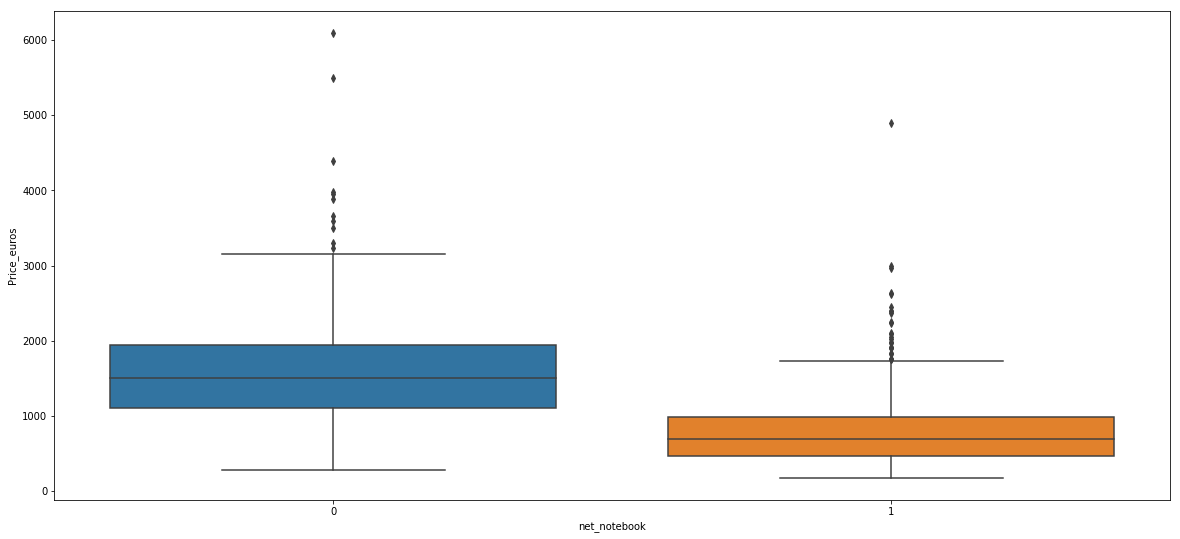

,Unnamed: 0,Inches,Price_euros
net_notebook,,,
0,675.148820,14.749002,1596.528475
1,649.170213,15.213697,777.230000


In [13]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "net_notebook", y = "Price_euros", data = df)
plt.show()
df.groupby('net_notebook').aggregate(np.mean)

In [159]:
netbook_prices = df.loc[df['net_notebook'] == 1, ['Price_euros']]
non_netbook_prices = df.loc[df['net_notebook'] == 0 , ['Price_euros']]

tval,pval=stats.ttest_ind(netbook_prices, non_netbook_prices)
print("t-value: ",tval)
print("p-value: ",pval)

t-value:  [-25.63112582]
p-value:  [1.26174409e-117]


In [14]:
df.net_notebook.dtypes

dtype('int64')

In [15]:
features['net_notebook'] = df['net_notebook']

## Inches

<Figure size 1440x648 with 0 Axes>

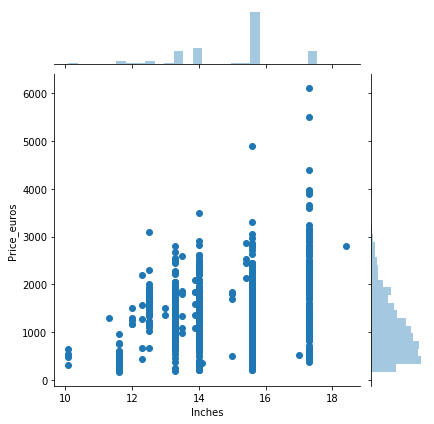

,Unnamed: 0,Price_euros,net_notebook
Inches,,,
10.1,854.500000,498.317500,0.000000
11.3,958.000000,1299.000000,0.000000
11.6,706.424242,393.613636,0.636364
12.0,737.333333,1279.900000,0.000000
12.3,666.200000,1228.200000,0.200000
12.5,892.307692,1583.493077,0.153846
13.0,196.500000,1424.000000,0.000000
13.3,659.445122,1332.318354,0.268293
13.5,373.666667,1612.308333,0.000000


In [16]:
plt.figure(figsize=(20,9))
sns.jointplot(x = 'Inches',y = 'Price_euros',data = df)
plt.show()
df.groupby('Inches').aggregate(np.mean)

* The majority of Inches are about 15.5
* There doesn't seem to be a strong correlation between Inches and Price_euros
* Inches doesn'tappear to be a useful feature to predict Price_euros

## ScreenResolution

In [17]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440               

* there are too many categories of ScreenResolution
* can use ScreenResolution to determine oif there is a touchscreen

In [18]:
df['touchscreen'] = '0'
for index, row in df.iterrows():
    touchscreen = df.loc[index, 'ScreenResolution']
    if "touchscreen" in touchscreen.lower():
        df.loc[[index], ['touchscreen']] = 1

In [19]:
df[['ScreenResolution', 'touchscreen']]

,ScreenResolution,touchscreen
0,IPS Panel Retina Display 2560x1600,0
1,1440x900,0
2,Full HD 1920x1080,0
3,IPS Panel Retina Display 2880x1800,0
4,IPS Panel Retina Display 2560x1600,0
5,1366x768,0
6,IPS Panel Retina Display 2880x1800,0
7,1440x900,0
8,Full HD 1920x1080,0
9,IPS Panel Full HD 1920x1080,0


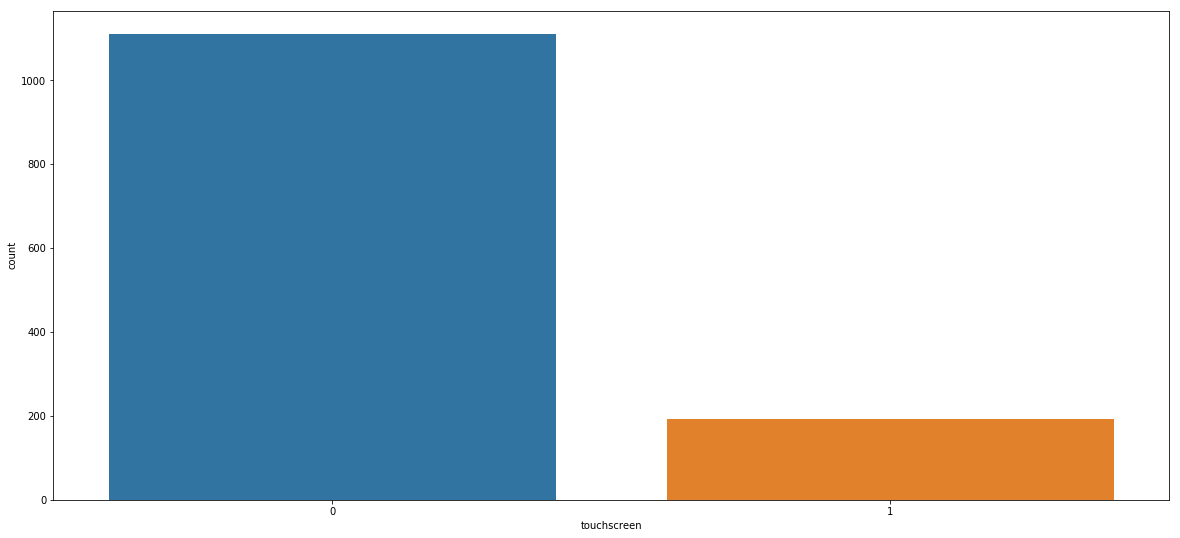

0    1111
1     192
Name: touchscreen, dtype: int64

In [20]:
plt.figure(figsize=(20,9))
sns.countplot(x='touchscreen',data=df)
plt.show()
df.touchscreen.value_counts()

In [21]:
df.touchscreen.dtypes

dtype('O')

In [22]:
df['touchscreen'] = df['touchscreen'].astype('int64')

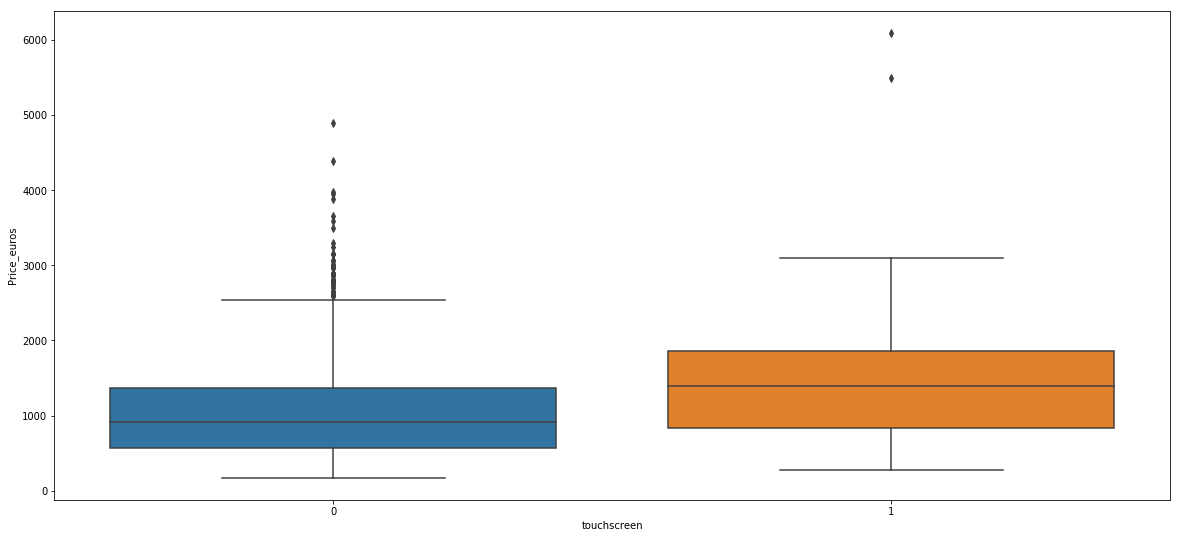

,Unnamed: 0,Inches,Price_euros,net_notebook
touchscreen,,,,
0,651.989199,15.231593,1068.140369,0.657966
1,707.411458,13.776562,1445.105208,0.109375


In [23]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "touchscreen", y = "Price_euros", data = df)
plt.show()
df.groupby('touchscreen').aggregate(np.mean)

In [155]:
touchscreen_prices = df.loc[df['touchscreen'] == 1, ['Price_euros']]
notouch_prices = df.loc[df['touchscreen'] == 0, ['Price_euros']]

tval,pval=stats.ttest_ind(touchscreen_prices, notouch_prices)
print("t-value: ",tval)
print("p-value: ",pval)

t-value:  [7.02709799]
p-value:  [3.39254804e-12]


In [24]:
features['touchscreen'] = df['touchscreen']

## Cpu

In [25]:
df.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
Intel Core i5 6200U 2.3GHz                68
Intel Core i3 6006U 2GHz                  64
Intel Core i7 6500U 2.5GHz                49
Intel Core i7 6700HQ 2.6GHz               43
Intel Core i3 7100U 2.4GHz                37
Intel Core i5 7300HQ 2.5GHz               33
Intel Celeron Dual Core N3350 1.1GHz      30
Intel Celeron Dual Core N3060 1.6GHz      28
Intel Core i7 6600U 2.6GHz                18
Intel Core i3 6006U 2.0GHz                16
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N3710 1.6GHz      11
Intel Core i5 6300U 2.4GHz                11
AMD A9-Series 9420 3GHz                   11
Intel Celeron Dual Core N3050 1.6GHz      11
Intel Core

### cpu ghz

the ghz speed is *uaully* the first 3 chars of the last 6 chars in the Cpu column

In [26]:
df['ghz'] = 0
for index, row in df.iterrows():
    ghz = df.loc[index, 'Cpu'][-6:]
    df.loc[[index], ['ghz']] = ghz[0:3]

In [27]:
df.ghz.value_counts()

2.5    290
2.8    165
2.7    165
1.6    133
2.3     86
1.8     78
2.6     76
U 2     64
1.1     53
2.4     52
2.9     21
2.0     19
0 3     16
1.2     15
.44     12
2.2     11
1.5     10
1.3      6
3.6      5
0.9      4
3.1      3
2.1      3
0 2      3
.50      3
6 3      2
1.9      2
1.0      1
3.2      1
.70      1
.92      1
P 3      1
.60      1
Name: ghz, dtype: int64

#### fix rows where ghz not properly extracted
1. examin Cpu value where ghz is invalid 
2. determine what the ghz value should be
3. update the ghz values

In [28]:
df.loc[df['ghz'] == 'U 2']['Cpu']

11      Intel Core i3 6006U 2GHz
13      Intel Core i3 6006U 2GHz
25      Intel Core i3 6006U 2GHz
40      Intel Core i3 6006U 2GHz
46      Intel Core i3 6006U 2GHz
56      Intel Core i3 6006U 2GHz
59      Intel Core i3 6006U 2GHz
66      Intel Core i3 6006U 2GHz
74      Intel Core i3 6006U 2GHz
97      Intel Core i3 6006U 2GHz
106     Intel Core i3 6006U 2GHz
118     Intel Core i3 6006U 2GHz
131     Intel Core i3 6006U 2GHz
149     Intel Core i3 6006U 2GHz
176     Intel Core i3 6006U 2GHz
212     Intel Core i3 6006U 2GHz
236     Intel Core i3 6006U 2GHz
240     Intel Core i3 6006U 2GHz
261     Intel Core i3 6006U 2GHz
278     Intel Core i3 6006U 2GHz
292     Intel Core i3 6006U 2GHz
309     Intel Core i3 6006U 2GHz
333     Intel Core i3 6006U 2GHz
360     Intel Core i3 6006U 2GHz
364     Intel Core i3 6006U 2GHz
381     Intel Core i3 6006U 2GHz
408     Intel Core i3 6006U 2GHz
412     Intel Core i3 6006U 2GHz
416     Intel Core i3 6006U 2GHz
459     Intel Core i3 6006U 2GHz
          

In [29]:
df.loc[df['ghz'] == 'U 2', 'ghz'] = 2.0

In [30]:
df.loc[df['ghz'] == '0 3', 'Cpu']

5          AMD A9-Series 9420 3GHz
47             AMD Ryzen 1700 3GHz
84         AMD A9-Series 9420 3GHz
124        AMD A9-Series 9420 3GHz
160        AMD A9-Series 9420 3GHz
252        AMD A9-Series 9420 3GHz
271            AMD Ryzen 1700 3GHz
371        AMD A9-Series 9420 3GHz
372            AMD Ryzen 1700 3GHz
375        AMD A9-Series 9420 3GHz
395        AMD A9-Series 9420 3GHz
572     AMD A9-Series A9-9420 3GHz
641        AMD A9-Series 9420 3GHz
729        AMD A9-Series 9420 3GHz
732     AMD A9-Series A9-9420 3GHz
1031       AMD A9-Series 9420 3GHz
Name: Cpu, dtype: object

In [31]:
df.loc[df['ghz'] == '0 3', 'ghz'] = 3.0

In [32]:
df.loc[df['ghz'] == '.44', 'Cpu']

20      Intel Atom x5-Z8350 1.44GHz
30      Intel Atom x5-Z8300 1.44GHz
50      Intel Atom x5-Z8550 1.44GHz
483     Intel Atom x5-Z8350 1.44GHz
556     Intel Atom x5-Z8350 1.44GHz
575     Intel Atom x5-Z8350 1.44GHz
626     Intel Atom x5-Z8350 1.44GHz
1041    Intel Atom X5-Z8350 1.44GHz
1082    Intel Atom x5-Z8550 1.44GHz
1114    Intel Atom x5-Z8550 1.44GHz
1120    Intel Atom X5-Z8350 1.44GHz
1126    Intel Atom x5-Z8550 1.44GHz
Name: Cpu, dtype: object

In [33]:
df.loc[df['ghz'] == '.44', 'ghz'] = 1.4

In [34]:
df.loc[df['ghz'] == '0.9', 'Cpu']

697     Intel Core M M3-6Y30 0.9GHz
1261       Intel Core M 6Y30 0.9GHz
1275       Intel Core M 6Y30 0.9GHz
1289       Intel Core M 6Y30 0.9GHz
Name: Cpu, dtype: object

In [35]:
df.loc[df['ghz'] == '0.9', 'ghz'] = 0.9

In [36]:
df.loc[df['ghz'] == '.50', 'Cpu']

964     Intel Core i5 7200U 2.50GHz
1146    Intel Core i7 6500U 2.50GHz
1230    Intel Core i7 6500U 2.50GHz
Name: Cpu, dtype: object

In [37]:
df.loc[df['ghz'] == '.50', 'ghz']= 2.5

In [38]:
df.loc[df['ghz'] == '0 2', 'Cpu']

717                AMD A6-Series 7310 2GHz
1183    Intel Celeron Dual Core N3350 2GHz
1198    Intel Celeron Dual Core N3350 2GHz
Name: Cpu, dtype: object

In [39]:
df.loc[df['ghz'] == '0 2', 'ghz'] = 2.0

In [40]:
df.loc[df['ghz'] == '6 3', 'Cpu']

204    Intel Xeon E3-1505M V6 3GHz
447    Intel Xeon E3-1505M V6 3GHz
Name: Cpu, dtype: object

In [41]:
df.loc[df['ghz'] == '6 3', 'ghz'] = 3.0

In [42]:
df.loc[df['ghz'] == '.60', 'Cpu']

377    Intel Celeron Dual Core N3060 1.60GHz
Name: Cpu, dtype: object

In [43]:
df.loc[df['ghz'] == '.60', 'ghz'] = 1.6

In [44]:
df.loc[df['ghz'] == 'P 3', 'Cpu']

90    AMD FX 9830P 3GHz
Name: Cpu, dtype: object

In [45]:
df.loc[df['ghz'] == 'P 3', 'ghz'] = 3.0

In [46]:
df.loc[df['ghz'] == '.92', 'Cpu']

718    Intel Atom Z8350 1.92GHz
Name: Cpu, dtype: object

In [47]:
df.loc[df['ghz'] == '.92', 'ghz'] = 1.9

In [48]:
df.loc[df['ghz'] == '.70', 'Cpu']

975    Intel Core i5 7200U 2.70GHz
Name: Cpu, dtype: object

In [49]:
df.loc[df['ghz'] == '.70', 'ghz'] =2.7

In [50]:
df.ghz.value_counts()

2.5    290
2.7    165
2.8    165
1.6    133
2.3     86
1.8     78
2.6     76
2.0     67
1.1     53
2.4     52
2.9     21
3.0     19
2.0     19
1.2     15
1.4     12
2.2     11
1.5     10
1.3      6
3.6      5
0.9      4
2.5      3
3.1      3
2.1      3
1.9      2
2.7      1
3.2      1
1.0      1
1.9      1
1.6      1
Name: ghz, dtype: int64

In [51]:
df.ghz.dtypes

dtype('O')

In [52]:
df['ghz'] = df['ghz'].astype('float64')

<Figure size 1440x648 with 0 Axes>

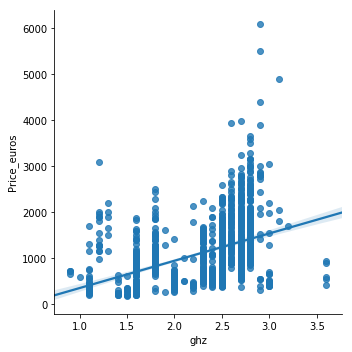

In [53]:
plt.figure(figsize=(20,9))
sns.lmplot(x = 'ghz',y = 'Price_euros',data = df)
plt.show()

In [54]:
features['ghz'] = df['ghz']

### cpu manufacture

In [55]:
cpus = df.Cpu.unique()

In [56]:
sorted(cpus)

['AMD A10-Series 9600P 2.4GHz',
 'AMD A10-Series 9620P 2.5GHz',
 'AMD A10-Series A10-9620P 2.5GHz',
 'AMD A12-Series 9700P 2.5GHz',
 'AMD A12-Series 9720P 2.7GHz',
 'AMD A12-Series 9720P 3.6GHz',
 'AMD A4-Series 7210 2.2GHz',
 'AMD A6-Series 7310 2GHz',
 'AMD A6-Series 9220 2.5GHz',
 'AMD A6-Series 9220 2.9GHz',
 'AMD A6-Series A6-9220 2.5GHz',
 'AMD A8-Series 7410 2.2GHz',
 'AMD A9-Series 9410 2.9GHz',
 'AMD A9-Series 9420 2.9GHz',
 'AMD A9-Series 9420 3GHz',
 'AMD A9-Series A9-9420 3GHz',
 'AMD E-Series 6110 1.5GHz',
 'AMD E-Series 7110 1.8GHz',
 'AMD E-Series 9000 2.2GHz',
 'AMD E-Series 9000e 1.5GHz',
 'AMD E-Series E2-6110 1.5GHz',
 'AMD E-Series E2-9000 2.2GHz',
 'AMD E-Series E2-9000e 1.5GHz',
 'AMD FX 8800P 2.1GHz',
 'AMD FX 9830P 3GHz',
 'AMD Ryzen 1600 3.2GHz',
 'AMD Ryzen 1700 3GHz',
 'Intel Atom X5-Z8350 1.44GHz',
 'Intel Atom Z8350 1.92GHz',
 'Intel Atom x5-Z8300 1.44GHz',
 'Intel Atom x5-Z8350 1.44GHz',
 'Intel Atom x5-Z8550 1.44GHz',
 'Intel Celeron Dual Core 3205U 1.5GH

In [57]:
df['cpu_manufacture'] = 'other'

for index, row in df.iterrows():
    cpu_manufacture = df.loc[index, 'Cpu']
    if "AMD" in cpu_manufacture:
        df.loc[[index], ['cpu_manufacture']] ="amd"
    if "Intel" in cpu_manufacture:
        df.loc[[index], ['cpu_manufacture']] ="intel"

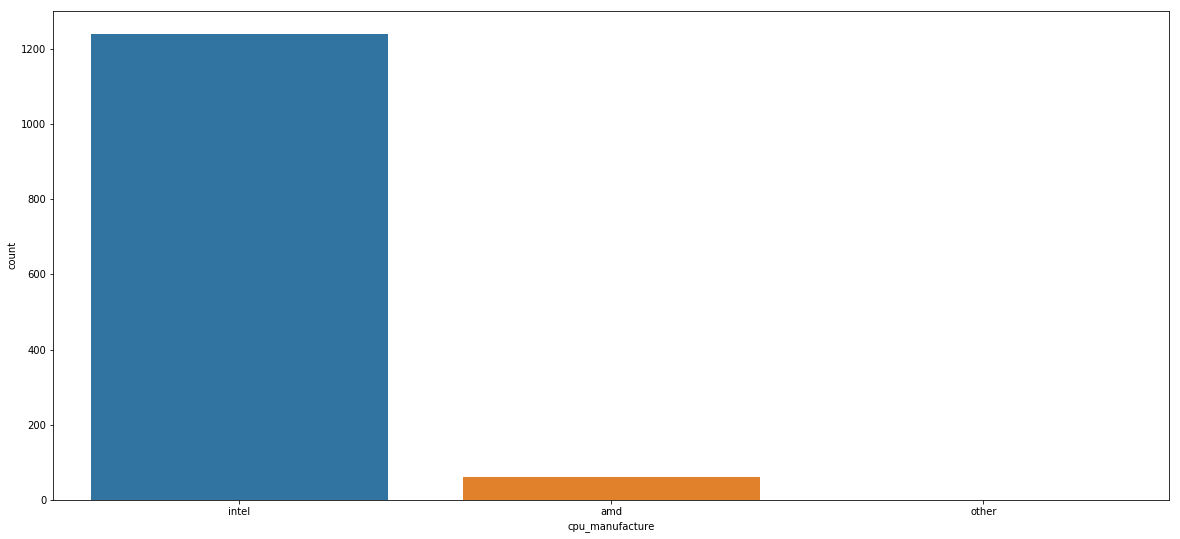

intel    1240
amd        62
other       1
Name: cpu_manufacture, dtype: int64

In [58]:
plt.figure(figsize=(20,9))
sns.countplot(x='cpu_manufacture',data=df)
plt.show()
df.cpu_manufacture.value_counts()

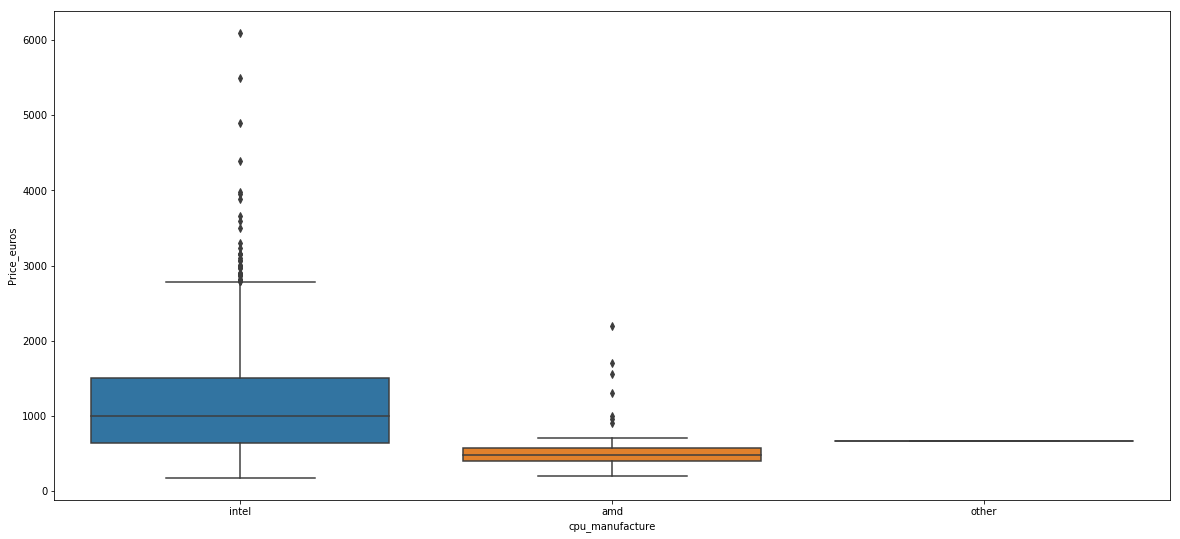

,Unnamed: 0,Inches,Price_euros,net_notebook,touchscreen,ghz
cpu_manufacture,,,,,,
amd,565.822581,15.845161,560.638871,0.887097,0.000000,2.620968
intel,664.429839,14.977984,1152.214145,0.562097,0.154032,2.282500
other,1209.000000,12.300000,659.000000,0.000000,1.000000,2.000000


In [59]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "cpu_manufacture", y = "Price_euros", data = df)
plt.show()
df.groupby('cpu_manufacture').aggregate(np.mean)

* computers with intel processors average twice is much price than amd or other
* create a binary intel or not feature

In [60]:
df['intel_cpu'] = 0

for index, row in df.iterrows():
    cpu_manufacture = df.loc[index, 'cpu_manufacture']
    if "intel" in cpu_manufacture:
        df.loc[[index], ['intel_cpu']] = 1

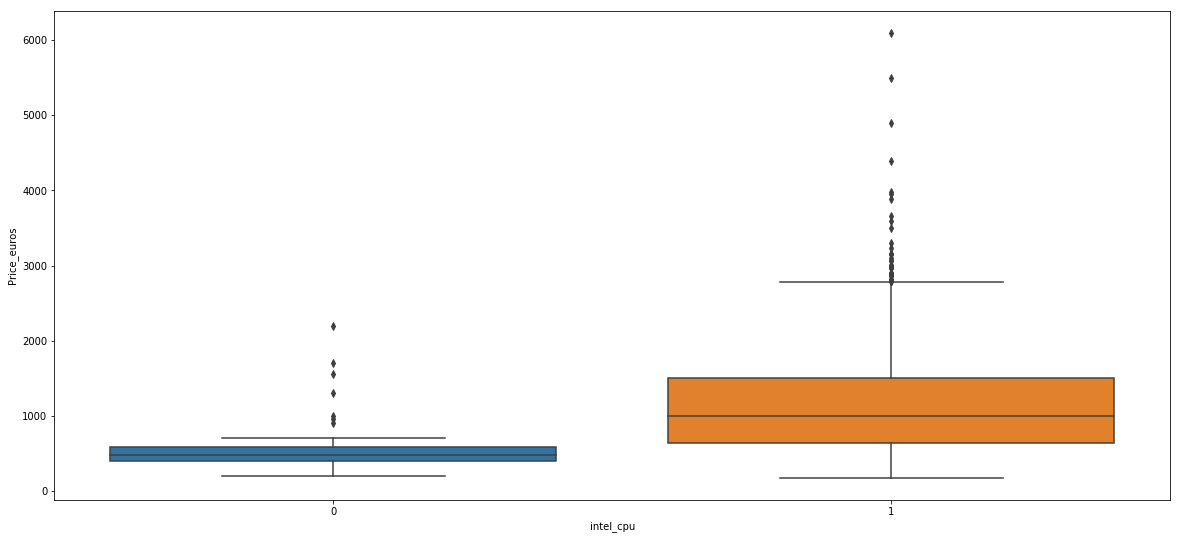

,Unnamed: 0,Inches,Price_euros,net_notebook,touchscreen,ghz
intel_cpu,,,,,,
0,576.031746,15.788889,562.200159,0.873016,0.015873,2.611111
1,664.429839,14.977984,1152.214145,0.562097,0.154032,2.282500


In [61]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "intel_cpu", y = "Price_euros", data = df)
plt.show()
df.groupby('intel_cpu').aggregate(np.mean)

In [160]:
intel_prices = df.loc[df['intel_cpu'] == 1, ['Price_euros']]
non_intel_prices = df.loc[df['intel_cpu'] == 0, ['Price_euros']]

tval,pval=stats.ttest_ind(intel_prices, non_intel_prices)
print("t-value: ",tval)
print("p-value: ",pval)

t-value:  [6.64301136]
p-value:  [4.50531633e-11]


In [62]:
df.intel_cpu.dtypes

dtype('int64')

In [63]:
features['intel_cpu'] = df['intel_cpu']

### number of cores

In [64]:
df['num_processors'] = 1

for index, row in df.iterrows():
    num_processors = df.loc[index, 'Cpu']
    if "Dual" in num_processors:
        df.loc[[index], ['num_processors']] = 2
    if "Quad" in num_processors:
        df.loc[[index], ['num_processors']] = 4

In [65]:
df[[ 'Cpu', 'cpu_manufacture', 'num_processors', 'ghz']]

,Cpu,cpu_manufacture,num_processors,ghz
0,Intel Core i5 2.3GHz,intel,1,2.3
1,Intel Core i5 1.8GHz,intel,1,1.8
2,Intel Core i5 7200U 2.5GHz,intel,1,2.5
3,Intel Core i7 2.7GHz,intel,1,2.7
4,Intel Core i5 3.1GHz,intel,1,3.1
5,AMD A9-Series 9420 3GHz,amd,1,3.0
6,Intel Core i7 2.2GHz,intel,1,2.2
7,Intel Core i5 1.8GHz,intel,1,1.8
8,Intel Core i7 8550U 1.8GHz,intel,1,1.8
9,Intel Core i5 8250U 1.6GHz,intel,1,1.6


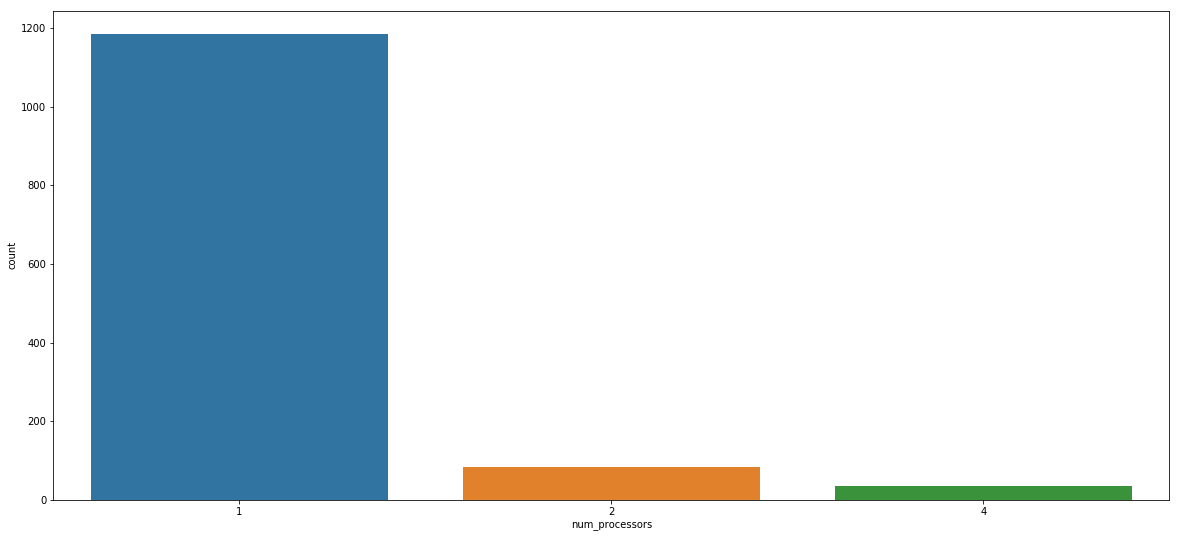

1    1185
2      83
4      35
Name: num_processors, dtype: int64

In [66]:
plt.figure(figsize=(20,9))
sns.countplot(x='num_processors',data=df)
plt.show()
df.num_processors.value_counts()

<Figure size 1440x648 with 0 Axes>

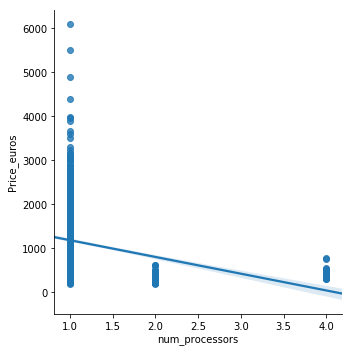

,Unnamed: 0,Inches,Price_euros,net_notebook,touchscreen,ghz,intel_cpu
num_processors,,,,,,,
1,651.264135,15.101097,1200.841384,0.543460,0.152743,2.388017,0.946835
2,768.734940,13.965060,321.383253,0.915663,0.096386,1.427711,1.000000
4,703.714286,14.671429,414.065714,0.914286,0.085714,1.328571,1.000000


In [67]:
plt.figure(figsize=(20,9))
sns.lmplot(x = 'num_processors',y = 'Price_euros',data = df)
plt.show()
df.groupby('num_processors').aggregate(np.mean)

In [68]:
df.num_processors.dtypes

dtype('int64')

In [69]:
features['num_processors'] = df['num_processors']

## Ram

In [70]:
df.Ram.value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [71]:
df['ram_gb'] = 0

In [72]:
df['ram_gb'] = df['Ram'].apply(lambda ram: ram.replace("GB",""))

In [73]:
df.ram_gb.value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: ram_gb, dtype: int64

In [74]:
df.ram_gb.dtypes

dtype('O')

In [75]:
df['ram_gb'] = df['ram_gb'].astype('int64')

<Figure size 1440x648 with 0 Axes>

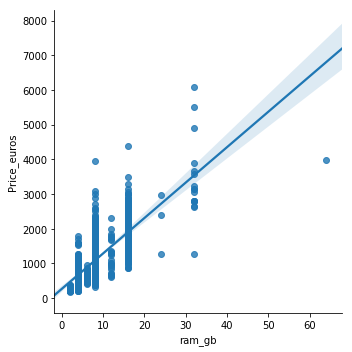

In [76]:
plt.figure(figsize=(20,9))
sns.lmplot(x = 'ram_gb',y = 'Price_euros',data = df)
plt.show()

In [77]:
features['ram_gb'] = df['ram_gb']

## Memory

In [78]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
8GB SSD                            1
5

In [79]:
df['memory_cleaned'] = df['Memory']

#### change all the memory types to 3 characters for consistency

In [80]:
df['memory_cleaned'] = df['memory_cleaned'].apply(lambda fsd: fsd.replace("Flash Storage","FSD"))
df['memory_cleaned'] = df['memory_cleaned'].apply(lambda hyb: hyb.replace("Hybrid","HYB"))

In [81]:
df.memory_cleaned.value_counts()

256GB SSD                 412
1TB HDD                   223
500GB HDD                 132
512GB SSD                 118
128GB SSD +  1TB HDD       94
128GB SSD                  76
256GB SSD +  1TB HDD       73
32GB FSD                   38
2TB HDD                    16
64GB FSD                   15
1TB SSD                    14
512GB SSD +  1TB HDD       14
256GB SSD +  2TB HDD       10
1.0TB HYB                   9
256GB FSD                   8
16GB FSD                    7
32GB SSD                    6
180GB SSD                   5
128GB FSD                   4
16GB SSD                    3
512GB SSD +  2TB HDD        3
256GB SSD +  500GB HDD      2
512GB FSD                   2
1TB SSD +  1TB HDD          2
256GB SSD +  256GB SSD      2
128GB SSD +  2TB HDD        2
1TB HDD +  1TB HDD          1
512GB SSD +  256GB SSD      1
512GB SSD +  512GB SSD      1
64GB FSD +  1TB HDD         1
240GB SSD                   1
64GB SSD                    1
8GB SSD                     1
256GB SSD 

#### remove units from data
1. convert all units to GB
2. remove GB from the data

In [82]:
# convert TB to GB
df['memory_cleaned'] = df['memory_cleaned'].apply(lambda tb2gb: tb2gb.replace("1TB","1000GB"))
df['memory_cleaned'] = df['memory_cleaned'].apply(lambda tb2gb: tb2gb.replace("2TB","2000GB"))
df['memory_cleaned'] = df['memory_cleaned'].apply(lambda tb2gb: tb2gb.replace("1.0TB","1000GB"))

In [83]:
df.memory_cleaned.value_counts()

256GB SSD                   412
1000GB HDD                  224
500GB HDD                   132
512GB SSD                   118
128GB SSD +  1000GB HDD      94
128GB SSD                    76
256GB SSD +  1000GB HDD      73
32GB FSD                     38
2000GB HDD                   16
64GB FSD                     15
512GB SSD +  1000GB HDD      14
1000GB SSD                   14
256GB SSD +  2000GB HDD      10
1000GB HYB                    9
256GB FSD                     8
16GB FSD                      7
32GB SSD                      6
180GB SSD                     5
128GB FSD                     4
16GB SSD                      3
512GB SSD +  2000GB HDD       3
256GB SSD +  256GB SSD        2
512GB FSD                     2
128GB SSD +  2000GB HDD       2
1000GB SSD +  1000GB HDD      2
256GB SSD +  500GB HDD        2
256GB SSD +  1000GB HYB       1
512GB SSD +  512GB SSD        1
8GB SSD                       1
64GB SSD                      1
240GB SSD                     1
1000GB H

In [84]:
# remove the GB
df['memory_cleaned'] = df['memory_cleaned'].apply(lambda gb: gb.replace("GB",""))

In [85]:
df.memory_cleaned.value_counts()

256 SSD                 412
1000 HDD                224
500 HDD                 132
512 SSD                 118
128 SSD +  1000 HDD      94
128 SSD                  76
256 SSD +  1000 HDD      73
32 FSD                   38
2000 HDD                 16
64 FSD                   15
512 SSD +  1000 HDD      14
1000 SSD                 14
256 SSD +  2000 HDD      10
1000 HYB                  9
256 FSD                   8
16 FSD                    7
32 SSD                    6
180 SSD                   5
128 FSD                   4
512 SSD +  2000 HDD       3
16 SSD                    3
512 FSD                   2
256 SSD +  256 SSD        2
128 SSD +  2000 HDD       2
256 SSD +  500 HDD        2
1000 SSD +  1000 HDD      2
8 SSD                     1
256 SSD +  1000 HYB       1
1000 HDD +  1000 HDD      1
512 SSD +  1000 HYB       1
32 HDD                    1
512 SSD +  512 SSD        1
64 FSD +  1000 HDD        1
128 HDD                   1
240 SSD                   1
512 SSD +  256 SSD  

### split dual memory devices
seperate dual memory devices into seperate columns

* the first memory device will *usually* be within the first 8 characters of memory_cleaned
* if there is a + in memory_cleaned, then that memory device will *usually* be within the last 8 characters of memory_cleaned

#### first memory device

In [86]:
# first memory will usually be within the first 8 characters
df['memory_1'] = '0'
for index, row in df.iterrows():
    memory_1 = df.loc[index, 'memory_cleaned'][0:8]
    df.loc[[index], ['memory_1']] = memory_1

In [87]:
df.memory_1.value_counts()

256 SSD     412
1000 HDD    225
500 HDD     132
512 SSD     118
128 SSD      96
256 SSD      88
128 SSD      76
32 FSD       38
512 SSD      20
2000 HDD     16
1000 SSD     16
64 FSD       15
1000 HYB      9
256 FSD       8
16 FSD        7
32 SSD        6
180 SSD       5
128 FSD       4
16 SSD        3
512 FSD       2
508 HYB       1
32 HDD        1
64 FSD +      1
64 SSD        1
128 HDD       1
8 SSD         1
240 SSD       1
Name: memory_1, dtype: int64

In [88]:
# remove the + from the 64 FSD
df.loc[df['memory_1'] == '64 FSD +', 'memory_1'] = "64 FSD"

In [89]:
df.memory_1.value_counts()

256 SSD     412
1000 HDD    225
500 HDD     132
512 SSD     118
128 SSD      96
256 SSD      88
128 SSD      76
32 FSD       38
512 SSD      20
2000 HDD     16
1000 SSD     16
64 FSD       16
1000 HYB      9
256 FSD       8
16 FSD        7
32 SSD        6
180 SSD       5
128 FSD       4
16 SSD        3
512 FSD       2
508 HYB       1
32 HDD        1
64 SSD        1
128 HDD       1
8 SSD         1
240 SSD       1
Name: memory_1, dtype: int64

In [90]:
## remove the spaces
df['memory_1'] = df['memory_1'].apply(lambda spc1: spc1.replace(" ",""))

In [91]:
df.memory_1.value_counts()

256SSD     500
1000HDD    225
128SSD     172
512SSD     138
500HDD     132
32FSD       38
1000SSD     16
64FSD       16
2000HDD     16
1000HYB      9
256FSD       8
16FSD        7
32SSD        6
180SSD       5
128FSD       4
16SSD        3
512FSD       2
128HDD       1
508HYB       1
240SSD       1
64SSD        1
8SSD         1
32HDD        1
Name: memory_1, dtype: int64

#### seond memory device

In [92]:
# if there is a + in the memory, that means there is a second device
# second memory device will usually be within the last 8 characters if it exists
df['memory_2'] = '0'
for index, row in df.iterrows():
    memory = df.loc[index, 'memory_cleaned']
    if "+" in memory:
        memory_2 = df.loc[index, 'memory_cleaned'][-8:]
        df.loc[[index], ['memory_2']] = memory_2

In [93]:
df.memory_2.value_counts()

0           1095
1000 HDD     185
2000 HDD      15
 256 SSD       3
1000 HYB       2
 500 HDD       2
 512 SSD       1
Name: memory_2, dtype: int64

In [94]:
## remove the spaces
df['memory_2'] = df['memory_2'].apply(lambda spc2: spc2.replace(" ",""))

In [95]:
df.memory_2.value_counts()

0          1095
1000HDD     185
2000HDD      15
256SSD        3
500HDD        2
1000HYB       2
512SSD        1
Name: memory_2, dtype: int64

### split memory capacity and type
* the last 3 characters are the memory type
* those last 3 characters can be removed once they are copied into their own column

#### first memory device

In [96]:
# memory type is the last 3 characters of memory
df['memory_1_type'] = 'non'
for index, row in df.iterrows():
    memory_1_type = df.loc[index, 'memory_1'][-3:]
    df.loc[[index], ['memory_1_type']] = memory_1_type

In [97]:
# memory capacity is everything up to the last 3 characters of memory
for index, row in df.iterrows():
    memory_1 = df.loc[index, 'memory_1'][:-3]
    df.loc[[index], ['memory_1']] = memory_1

In [98]:
df.memory_1.value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
508       1
8         1
240       1
Name: memory_1, dtype: int64

#### second memory device

In [99]:
# memory type is the last 3 characters of memory
df['memory_2_type'] = 'non'
for index, row in df.iterrows():
    memory_2_type = df.loc[index, 'memory_2'][-3:]
    df.loc[[index], ['memory_2_type']] = memory_2_type

In [100]:
# memory capacity is everything up to the last 3 characters of memory
for index, row in df.iterrows():
    memory_2 = df.loc[index, 'memory_2'][:-3]
    if len(memory_2) == 0:
        memory_2 = 0
    df.loc[[index], ['memory_2']] = memory_2

In [101]:
df[['Memory','memory_1', 'memory_1_type', 'memory_2', 'memory_2_type']]

,Memory,memory_1,memory_1_type,memory_2,memory_2_type
0,128GB SSD,128,SSD,0,0
1,128GB Flash Storage,128,FSD,0,0
2,256GB SSD,256,SSD,0,0
3,512GB SSD,512,SSD,0,0
4,256GB SSD,256,SSD,0,0
5,500GB HDD,500,HDD,0,0
6,256GB Flash Storage,256,FSD,0,0
7,256GB Flash Storage,256,FSD,0,0
8,512GB SSD,512,SSD,0,0
9,256GB SSD,256,SSD,0,0


### narrow memory types down to two
* want to combine the 4 different memory types into 2 options 

* get the mean price for each type of memory

*combine FSD and HYB with SSD or HDD depending on similar mean prices

In [102]:
df['memory_1'] = df['memory_1'].astype('int64')
df['memory_2'] = df['memory_2'].astype('int64')

In [103]:
df.memory_1_type.value_counts()

SSD    843
HDD    375
FSD     75
HYB     10
Name: memory_1_type, dtype: int64

In [104]:
df.memory_2_type.value_counts()

0      1095
HDD     202
SSD       4
HYB       2
Name: memory_2_type, dtype: int64

In [105]:
df.groupby('memory_1_type').aggregate(np.mean)

,Unnamed: 0,Inches,Price_euros,net_notebook,touchscreen,ghz,intel_cpu,num_processors,ram_gb,memory_1,memory_2
memory_1_type,,,,,,,,,,,
FSD,704.546667,12.894667,527.608267,0.640000,0.173333,1.477333,0.973333,1.786667,4.426667,79.146667,13.333333
HDD,690.234667,15.625333,655.297760,0.877333,0.058667,2.225600,0.917333,1.253333,5.834667,861.760000,2.666667
HYB,1085.800000,15.440000,810.746000,0.800000,0.000000,2.610000,0.700000,1.000000,7.400000,950.800000,0.000000
SSD,637.776987,14.930486,1388.789336,0.435350,0.186240,2.400119,0.967972,1.040332,9.879004,282.472123,257.746145


In [106]:
df.groupby('memory_2_type').aggregate(np.mean)

,Unnamed: 0,Inches,Price_euros,net_notebook,touchscreen,ghz,intel_cpu,num_processors,ram_gb,memory_1,memory_2
memory_2_type,,,,,,,,,,,
0,662.323288,14.764475,1029.392201,0.641096,0.169863,2.243562,0.948858,1.171689,7.486758,482.747032,0.000000
HDD,649.237624,16.355941,1610.424455,0.247525,0.024752,2.596040,0.965347,1.000000,12.930693,226.811881,1069.306931
HYB,1113.500000,17.300000,2994.995000,0.000000,0.000000,2.700000,1.000000,1.000000,24.000000,384.000000,1000.000000
SSD,391.500000,15.450000,1420.990000,0.000000,0.250000,2.075000,1.000000,1.000000,16.000000,384.000000,320.000000


**Note:** FSD devices average significanly less storage than SSDF

If we compare the mean price of a SSD device to an FSD device, we are actually compareing the price by how much memory

To see how the type of memory effects the price, we need to equalize the amount of memory

create a new column to to determine the mean price per 1 gb of memory

then see how 1 gb of FSD compares to 1 GB of SSD

this way we can see how the type of memeory impacts the price independently of the amount of memory

In [107]:
df['price_per_gb'] = df['Price_euros'] / df['memory_1']

In [108]:
pd.set_option('max_columns', 34)
df.sort_values('price_per_gb', ascending=False).head(3)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,net_notebook,touchscreen,ghz,cpu_manufacture,intel_cpu,num_processors,ram_gb,memory_cleaned,memory_1,memory_2,memory_1_type,memory_2_type,price_per_gb
950,964,HP,ZBook Studio,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8GB,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.0kg,2249.0,0,0,2.7,intel,1,1,8,8 SSD,8,0,SSD,0,281.125000
447,454,Dell,Precision 3520,Workstation,15.6,Full HD 1920x1080,Intel Xeon E3-1505M V6 3GHz,8GB,64GB Flash Storage + 1TB HDD,Nvidia Quadro M620,Windows 10,2.23kg,1993.0,0,0,3.0,intel,1,1,8,64 FSD + 1000 HDD,64,1000,FSD,HDD,31.140625
317,322,Lenovo,ThinkPad 13,Notebook,13.3,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,459.9,1,0,1.6,intel,1,2,4,16 FSD,16,0,FSD,0,28.743750


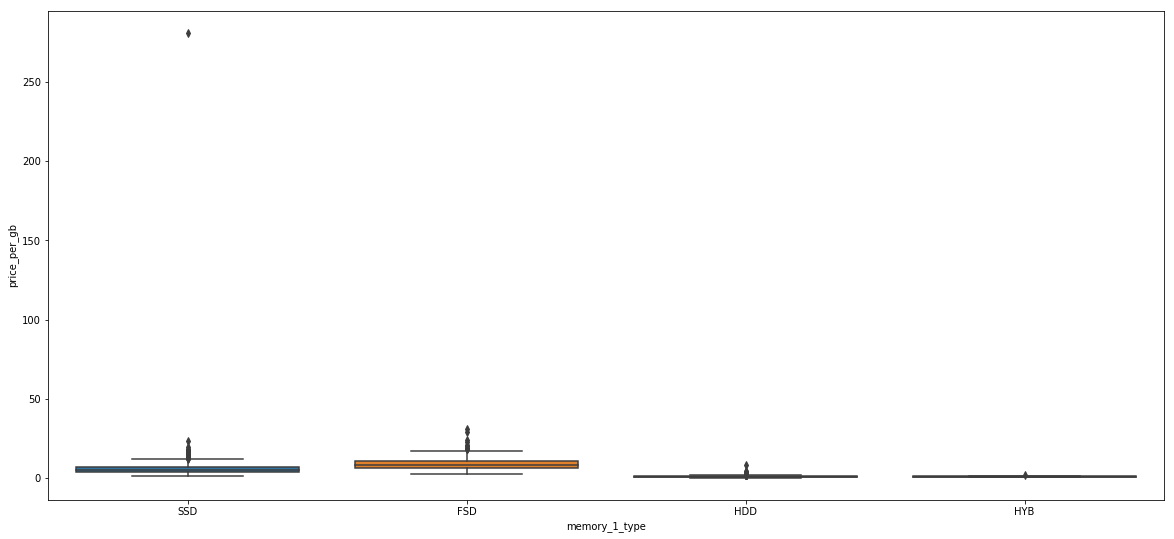

,Unnamed: 0,Inches,Price_euros,net_notebook,touchscreen,ghz,intel_cpu,num_processors,ram_gb,memory_1,memory_2,price_per_gb
memory_1_type,,,,,,,,,,,,
FSD,704.546667,12.894667,527.608267,0.640000,0.173333,1.477333,0.973333,1.786667,4.426667,79.146667,13.333333,9.618666
HDD,690.234667,15.625333,655.297760,0.877333,0.058667,2.225600,0.917333,1.253333,5.834667,861.760000,2.666667,0.894583
HYB,1085.800000,15.440000,810.746000,0.800000,0.000000,2.610000,0.700000,1.000000,7.400000,950.800000,0.000000,0.907790
SSD,637.776987,14.930486,1388.789336,0.435350,0.186240,2.400119,0.967972,1.040332,9.879004,282.472123,257.746145,5.885258


In [109]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "memory_1_type", y = "price_per_gb", data = df)
plt.show()
df.groupby('memory_1_type').aggregate(np.mean)

* FSD and SSD are much more expensive ypes of memory than HYB or HDD
* HYB and HDD seem to be about the same
* FSD is almost twice as expensive as SSD

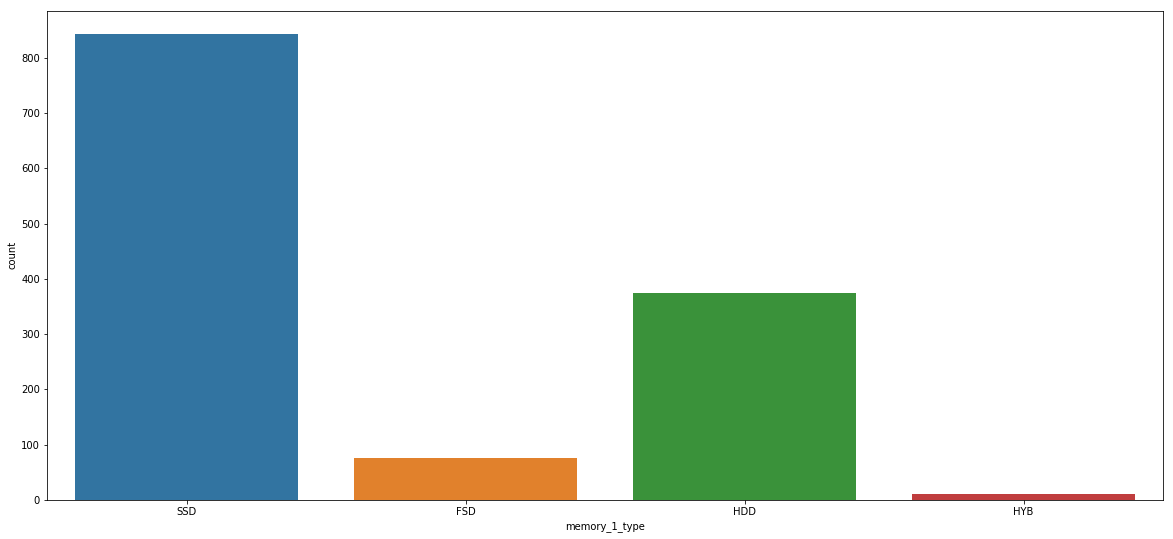

percentage of memory that is FSD:  5.755947812739831


In [110]:
plt.figure(figsize=(20,9))
sns.countplot(x='memory_1_type',data=df)
plt.show()
df.TypeName.value_counts()
print('percentage of memory that is FSD: ', (df.loc[df['memory_1_type'] == 'FSD', 'memory_1_type'].count() / df.shape[0])*100)

* FSD is too small a percentage to make its own feature

#### memory_1_ssd_fsd binary column
* FSD and SSD can be grouped together
* HDD and HYB can be grouped together
* new column, memory_1_ssd_fsd, with a binary value
* memory_1 is either SSD or FSD or it's not (meaning, it is HDD or HYB)

In [111]:
df['memory_1_ssd_fsd'] = 0

for index, row in df.iterrows():
    memory_1_type = df.loc[index, 'memory_1_type']
    if "SSD" in memory_1_type:
        df.loc[[index], ['memory_1_ssd_fsd']] = 1
    if "FSD" in memory_1_type:
        df.loc[[index], ['memory_1_ssd_fsd']] = 1

#### memory_2_ssd_fsd binary column

In [112]:
df['memory_2_ssd_fsd'] = 0

for index, row in df.iterrows():
    memory_2_type = df.loc[index, 'memory_2_type']
    if "SSD" in memory_2_type:
        df.loc[[index], ['memory_2_ssd_fsd']] = 1
    if "FSD" in memory_2_type:
        df.loc[[index], ['memory_2_ssd_fsd']] = 1

In [113]:
df[['Memory','memory_1', 'memory_1_type', 'memory_1_ssd_fsd', 'memory_2', 'memory_2_type', 'memory_2_ssd_fsd']]

,Memory,memory_1,memory_1_type,memory_1_ssd_fsd,memory_2,memory_2_type,memory_2_ssd_fsd
0,128GB SSD,128,SSD,1,0,0,0
1,128GB Flash Storage,128,FSD,1,0,0,0
2,256GB SSD,256,SSD,1,0,0,0
3,512GB SSD,512,SSD,1,0,0,0
4,256GB SSD,256,SSD,1,0,0,0
5,500GB HDD,500,HDD,0,0,0,0
6,256GB Flash Storage,256,FSD,1,0,0,0
7,256GB Flash Storage,256,FSD,1,0,0,0
8,512GB SSD,512,SSD,1,0,0,0
9,256GB SSD,256,SSD,1,0,0,0


In [114]:
df.memory_2.dtypes

dtype('int64')

In [115]:
df.memory_2_ssd_fsd.dtypes

dtype('int64')

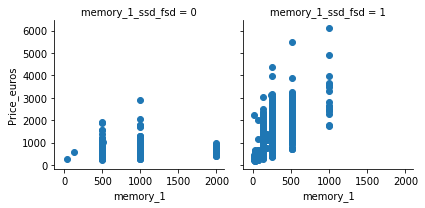

In [116]:
g = sns.FacetGrid(df, col = "memory_1_ssd_fsd")
g.map(plt.scatter, "memory_1", "Price_euros")
plt.show()

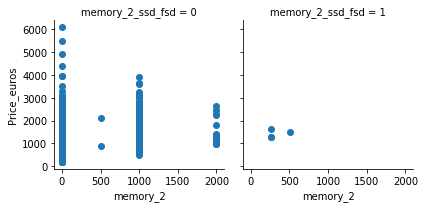

In [117]:
g = sns.FacetGrid(df, col = "memory_2_ssd_fsd")
g.map(plt.scatter, "memory_2", "Price_euros")
plt.show()

* the only memory that appears to impact price is ssd/fsd memory
* create a single interaction that is amount of ssd/fsd memory

In [118]:
features['memory_ssd_fsd'] = df['memory_1_ssd_fsd'] * df['memory_1']

## Gpu

In [119]:
Gpu_man = df.Gpu.unique()
Gpu_man.sort()
Gpu_man

array(['AMD FirePro W4190M', 'AMD FirePro W4190M ', 'AMD FirePro W5130M',
       'AMD FirePro W6150M', 'AMD R17M-M1-70', 'AMD R4 Graphics',
       'AMD Radeon 520', 'AMD Radeon 530', 'AMD Radeon 540',
       'AMD Radeon Pro 455', 'AMD Radeon Pro 555', 'AMD Radeon Pro 560',
       'AMD Radeon R2', 'AMD Radeon R2 Graphics', 'AMD Radeon R3',
       'AMD Radeon R4', 'AMD Radeon R4 Graphics', 'AMD Radeon R5',
       'AMD Radeon R5 430', 'AMD Radeon R5 520', 'AMD Radeon R5 M315',
       'AMD Radeon R5 M330', 'AMD Radeon R5 M420', 'AMD Radeon R5 M420X',
       'AMD Radeon R5 M430', 'AMD Radeon R7', 'AMD Radeon R7 Graphics',
       'AMD Radeon R7 M360', 'AMD Radeon R7 M365X', 'AMD Radeon R7 M440',
       'AMD Radeon R7 M445', 'AMD Radeon R7 M460', 'AMD Radeon R7 M465',
       'AMD Radeon R9 M385', 'AMD Radeon RX 540', 'AMD Radeon RX 550',
       'AMD Radeon RX 560', 'AMD Radeon RX 580', 'ARM Mali T860 MP4',
       'Intel Graphics 620', 'Intel HD Graphics', 'Intel HD Graphics 400',
       'Inte

In [120]:
df['gpu_manufacture'] = 'other'

for index, row in df.iterrows():
    gpu_manufacture = df.loc[index, 'Gpu']
    if "Intel" in gpu_manufacture:
        df.loc[[index], ['gpu_manufacture']] ="intel"
    if "Nvidia" in gpu_manufacture:
        df.loc[[index], ['gpu_manufacture']] ="nvidia"
    if "AMD" in gpu_manufacture:
        df.loc[[index], ['gpu_manufacture']] ="amd"

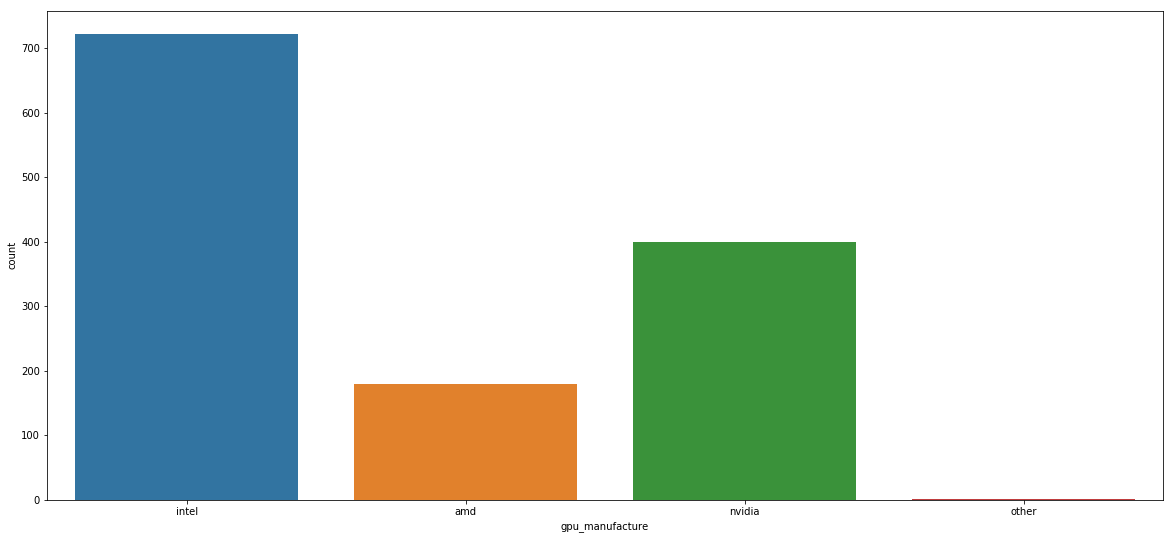

intel     722
nvidia    400
amd       180
other       1
Name: gpu_manufacture, dtype: int64

In [121]:
plt.figure(figsize=(20,9))
sns.countplot(x='gpu_manufacture',data=df)
plt.show()
df.gpu_manufacture.value_counts()

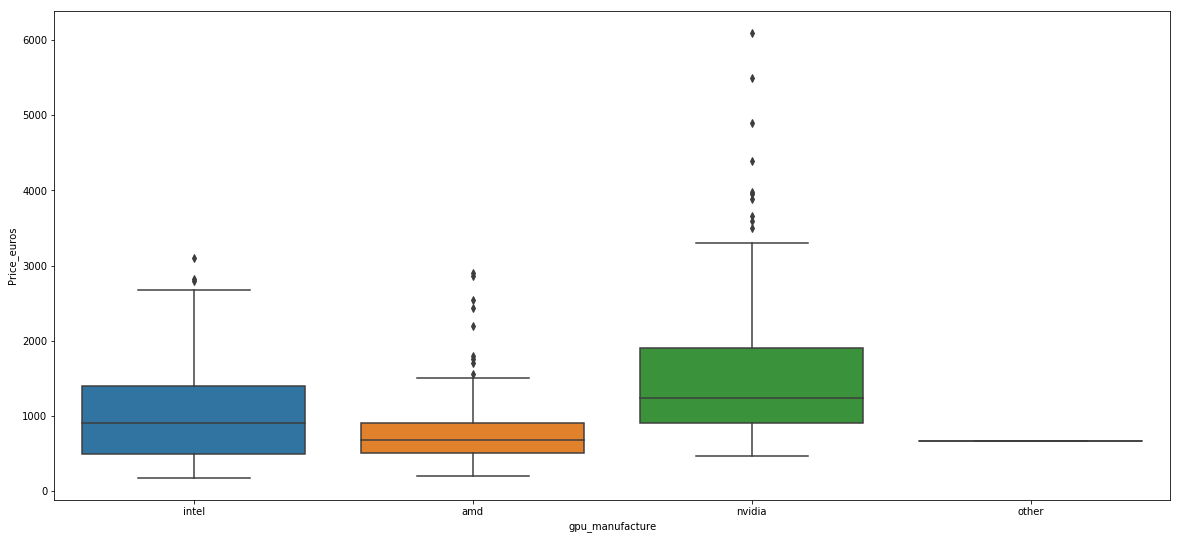

,Unnamed: 0,Inches,Price_euros,net_notebook,touchscreen,ghz,intel_cpu,num_processors,ram_gb,memory_1,memory_2,price_per_gb,memory_1_ssd_fsd,memory_2_ssd_fsd
gpu_manufacture,,,,,,,,,,,,,,
amd,575.405556,15.754444,775.647667,0.877778,0.016667,2.340556,0.655556,1.000000,7.200000,583.888889,200.000000,2.517917,0.516667,0.000000
intel,692.448753,14.259695,1008.225582,0.614958,0.228532,2.132964,1.000000,1.247922,6.925208,404.000000,9.036011,4.227738,0.716066,0.004155
nvidia,638.632500,16.059500,1489.874250,0.375000,0.057500,2.578750,1.000000,1.022500,11.555000,449.770000,441.890000,6.252433,0.767500,0.002500
other,1209.000000,12.300000,659.000000,0.000000,1.000000,2.000000,0.000000,1.000000,4.000000,32.000000,0.000000,20.593750,1.000000,0.000000


In [122]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "gpu_manufacture", y = "Price_euros", data = df)
plt.show()
df.groupby('gpu_manufacture').aggregate(np.mean)

* it looks like there is a difference between intel, amd, other
* create two binary features, is_intel and is_nvida
* if it's neither of those, must be other

In [143]:
df['gpu_intel'] = 0
df['gpu_nvidia'] = 0

for index, row in df.iterrows():
    gpu_manufacture = df.loc[index, 'gpu_manufacture']
    if "intel" in gpu_manufacture:
        df.loc[[index], ['gpu_intel']] = 1
    if "nvidia" in gpu_manufacture:
        df.loc[[index], ['gpu_nvidia']] = 1

In [124]:
df[['Gpu', 'gpu_manufacture', 'gpu_intel', 'gpu_nvidia']]

,Gpu,gpu_manufacture,gpu_intel,gpu_nvidia
0,Intel Iris Plus Graphics 640,intel,0,0
1,Intel HD Graphics 6000,intel,0,0
2,Intel HD Graphics 620,intel,0,0
3,AMD Radeon Pro 455,amd,0,0
4,Intel Iris Plus Graphics 650,intel,0,0
5,AMD Radeon R5,amd,0,0
6,Intel Iris Pro Graphics,intel,0,0
7,Intel HD Graphics 6000,intel,0,0
8,Nvidia GeForce MX150,nvidia,0,0
9,Intel UHD Graphics 620,intel,0,0


In [144]:
features['gpu_intel'] = df['gpu_intel']
features['gpu_nvida'] = df['gpu_nvidia']

## OpSys

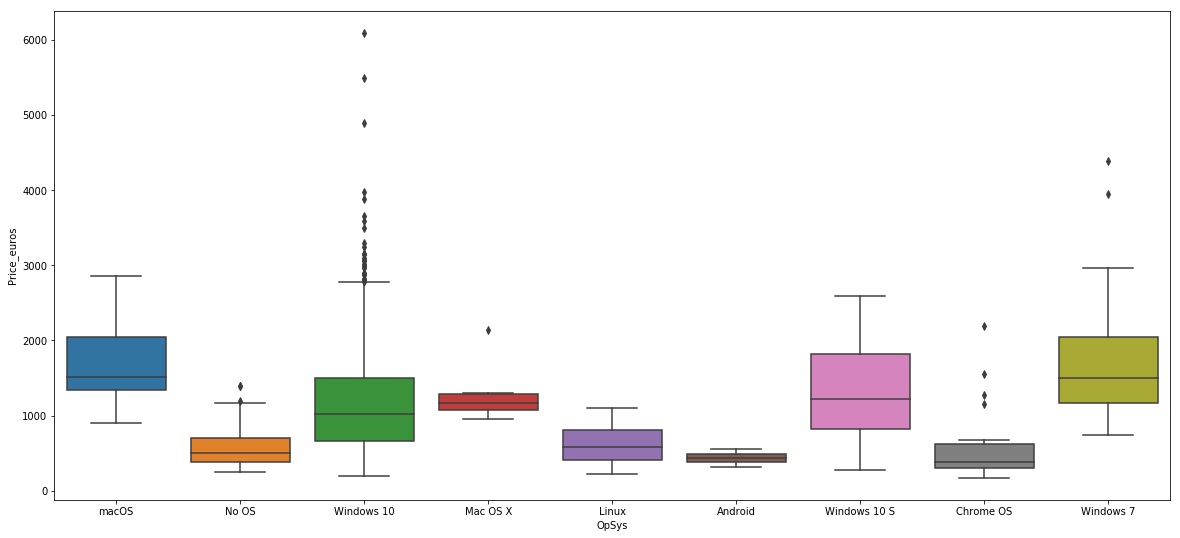

,Unnamed: 0,Inches,Price_euros,net_notebook,touchscreen,ghz,intel_cpu,num_processors,ram_gb,memory_1,memory_2,price_per_gb,memory_1_ssd_fsd,memory_2_ssd_fsd,gpu_intel,gpu_nvidia
OpSys,,,,,,,,,,,,,,,,
Android,590.000000,10.100000,434.000000,0.000000,1.000000,1.400000,1.000000,1.000000,4.000000,64.000000,0.000000,6.781250,1.000000,0.000000,0.0,0.0
Chrome OS,782.555556,12.696296,553.585185,0.629630,0.333333,1.477778,0.962963,1.925926,4.814815,59.259259,0.000000,14.418012,1.000000,0.000000,0.0,0.0
No OS,545.318182,15.696970,587.973333,0.848485,0.000000,2.210606,0.969697,1.181818,6.424242,683.818182,60.606061,1.628296,0.363636,0.000000,0.0,0.0
Linux,633.580645,15.620968,617.068871,0.903226,0.016129,2.206452,1.000000,1.306452,6.258065,663.032258,64.516129,1.621054,0.322581,0.000000,0.0,0.0
Windows 10,658.611940,15.075840,1168.139478,0.557836,0.160448,2.332276,0.944963,1.122201,8.735075,432.619403,197.089552,4.653742,0.728545,0.003731,0.0,0.0
Mac OS X,705.875000,12.700000,1262.871250,0.000000,0.000000,1.450000,1.000000,1.000000,8.500000,304.000000,0.000000,4.873032,1.000000,0.000000,0.0,0.0
Windows 10 S,359.875000,13.325000,1286.480000,0.250000,0.750000,2.200000,0.875000,1.125000,7.000000,208.000000,0.000000,6.313140,1.000000,0.000000,0.0,0.0
Windows 7,1051.177778,14.528889,1686.651333,0.511111,0.044444,2.440000,1.000000,1.000000,7.911111,367.644444,0.000000,5.817806,0.777778,0.000000,0.0,0.0
macOS,56.923077,13.584615,1749.630769,0.000000,0.000000,2.323077,1.000000,1.000000,9.846154,334.769231,0.000000,5.868887,1.000000,0.000000,0.0,0.0


In [126]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "OpSys", y = "Price_euros", data = df)
plt.show()
df.groupby('OpSys').aggregate(np.mean).sort_values('Price_euros')

* the major OS like mac and windows average about twice as much as other OS
* create two variables, mac/win and other, to compare their averages
* one one variable required for the model

In [127]:
df['os_mac_win'] = 0
df['os_other'] = 1

for index, row in df.iterrows():
    OpSys = df.loc[index, 'OpSys']
    if "win" in OpSys.lower():
        df.loc[[index], ['os_mac_win']] = 1
    if "mac" in OpSys.lower():
        df.loc[[index], ['os_mac_win']] = 1

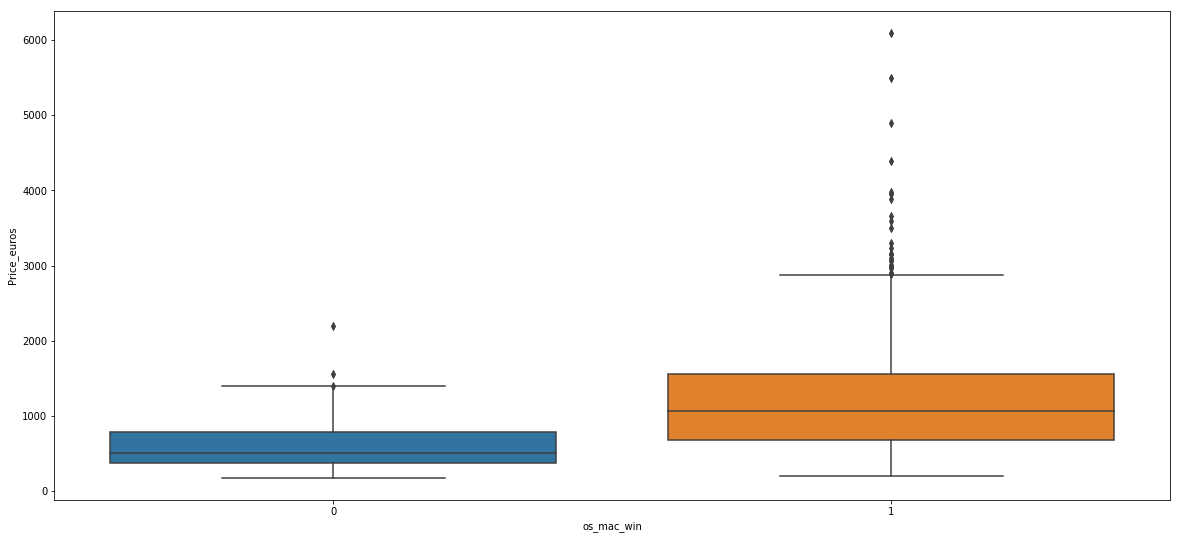

,Unnamed: 0,Inches,Price_euros,net_notebook,touchscreen,ghz,intel_cpu,num_processors,ram_gb,memory_1,memory_2,price_per_gb,memory_1_ssd_fsd,memory_2_ssd_fsd,gpu_intel,gpu_nvidia,os_other
os_mac_win,,,,,,,,,,,,,,,,,
0,621.541401,15.079618,591.587962,0.821656,0.076433,2.072611,0.980892,1.356688,6.050955,560.305732,50.955414,3.890584,0.464968,0.00000,0.0,0.0,1.0
1,665.445899,15.008639,1196.583630,0.543630,0.157068,2.329319,0.947644,1.115183,8.701571,426.492147,184.363002,4.726350,0.737347,0.00349,0.0,0.0,1.0


In [128]:
plt.figure(figsize=(20,9))
sns.boxplot(x = "os_mac_win", y = "Price_euros", data = df)
plt.show()
df.groupby('os_mac_win').aggregate(np.mean).sort_values('Price_euros')

In [129]:
features['os_mac_win'] = df['os_mac_win']

## Weight

In [130]:
df.sort_values(by=['Weight'])['Weight']

1126     0.69kg
1114     0.69kg
1082     0.69kg
50       0.69kg
746      0.81kg
812      0.81kg
489      0.91kg
1069    0.920kg
1210    0.920kg
794     0.920kg
1193    0.920kg
81       0.92kg
14       0.92kg
146      0.97kg
990      0.97kg
909      0.98kg
20       0.98kg
1080     0.99kg
1118     1.05kg
170      1.05kg
895      1.05kg
491      1.05kg
479      1.05kg
862      1.05kg
214      1.05kg
905      1.08kg
1234     1.08kg
678      1.09kg
911      1.09kg
405      1.10kg
         ...   
788       4.2kg
1189      4.2kg
494      4.33kg
939      4.36kg
818      4.36kg
723      4.36kg
955      4.36kg
1099      4.3kg
1197      4.3kg
251       4.3kg
781       4.3kg
841      4.42kg
758      4.42kg
780      4.42kg
968      4.42kg
659      4.42kg
224      4.42kg
456      4.42kg
552      4.42kg
530      4.42kg
972      4.42kg
424      4.42kg
177       4.4kg
585       4.5kg
1081      4.6kg
1048      4.6kg
577       4.6kg
1116      4.6kg
238       4.7kg
1061        4kg
Name: Weight, Length: 13

In [131]:
# remove kg from Weight
df['kg'] = df['Weight'].apply(lambda kg: kg.replace("kg",""))

In [132]:
df.sort_values(by=['kg'])['kg']

50       0.69
1126     0.69
1082     0.69
1114     0.69
812      0.81
746      0.81
489      0.91
81       0.92
14       0.92
1069    0.920
1193    0.920
1210    0.920
794     0.920
146      0.97
990      0.97
20       0.98
909      0.98
1080     0.99
862      1.05
895      1.05
170      1.05
1118     1.05
214      1.05
479      1.05
491      1.05
905      1.08
1234     1.08
911      1.09
678      1.09
826       1.1
        ...  
730       4.2
1189      4.2
788       4.2
1099      4.3
1197      4.3
251       4.3
781       4.3
494      4.33
723      4.36
939      4.36
818      4.36
955      4.36
177       4.4
780      4.42
841      4.42
758      4.42
224      4.42
552      4.42
659      4.42
424      4.42
456      4.42
972      4.42
968      4.42
530      4.42
585       4.5
1048      4.6
577       4.6
1116      4.6
1081      4.6
238       4.7
Name: kg, Length: 1303, dtype: object

In [133]:
df.kg.dtypes

dtype('O')

In [134]:
df['kg'] = df['kg'].astype('float64')

<Figure size 1440x648 with 0 Axes>

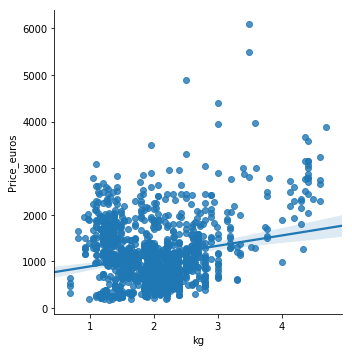

In [135]:
plt.figure(figsize=(20,9))
sns.lmplot(x = 'kg',y = 'Price_euros',data = df)
plt.show()

In [136]:
features['kg'] = df['kg']

## Price_euros

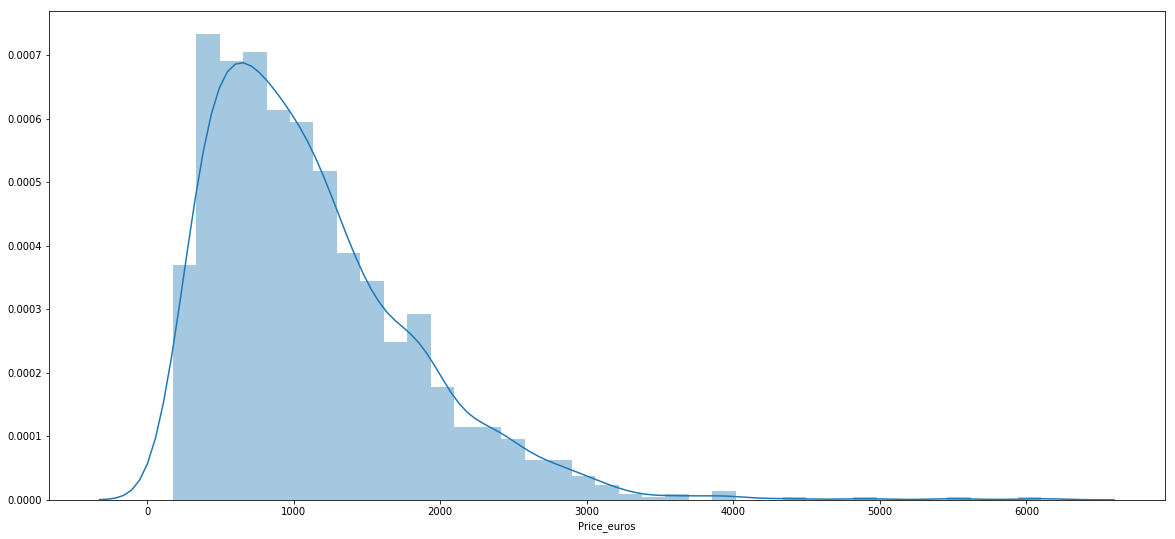

In [137]:
plt.figure(figsize=(20,9))
sns.distplot(df['Price_euros'],kde = True)
plt.show()

In [138]:
df.Price_euros.dtypes

dtype('float64')

In [139]:
features['price_euros'] = df['Price_euros']

# feature selection

In [145]:
features.head(10)

,net_notebook,touchscreen,ghz,intel_cpu,num_processors,ram_gb,memory_ssd_fsd,gpu_intel,gpu_nvida,os_mac_win,kg,price_euros
0,0,0,2.3,1,1,8,128,1,0,1,1.37,1339.69
1,0,0,1.8,1,1,8,128,1,0,1,1.34,898.94
2,1,0,2.5,1,1,8,256,1,0,0,1.86,575.00
3,0,0,2.7,1,1,16,512,0,0,1,1.83,2537.45
4,0,0,3.1,1,1,8,256,1,0,1,1.37,1803.60
5,1,0,3.0,0,1,4,0,0,0,1,2.10,400.00
6,0,0,2.2,1,1,16,256,1,0,1,2.04,2139.97
7,0,0,1.8,1,1,8,256,1,0,1,1.34,1158.70
8,0,0,1.8,1,1,16,512,0,1,1,1.30,1495.00
9,0,0,1.6,1,1,8,256,1,0,1,1.60,770.00


In [146]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
net_notebook      1303 non-null int64
touchscreen       1303 non-null int64
ghz               1303 non-null float64
intel_cpu         1303 non-null int64
num_processors    1303 non-null int64
ram_gb            1303 non-null int64
memory_ssd_fsd    1303 non-null int64
gpu_intel         1303 non-null int64
gpu_nvida         1303 non-null int64
os_mac_win        1303 non-null int64
kg                1303 non-null float64
price_euros       1303 non-null float64
dtypes: float64(3), int64(9)
memory usage: 122.2 KB


In [147]:
features.corr()

,net_notebook,touchscreen,ghz,intel_cpu,num_processors,ram_gb,memory_ssd_fsd,gpu_intel,gpu_nvida,os_mac_win,kg,price_euros
net_notebook,1.000000,-0.393615,-0.236302,-0.135003,0.184903,-0.447287,-0.429023,0.085362,-0.272318,-0.183207,-0.007701,-0.579250
touchscreen,-0.393615,1.000000,-0.082842,0.083609,-0.043434,0.116984,0.253940,0.255308,-0.168714,0.074056,-0.294620,0.191226
ghz,-0.236302,-0.082842,1.000000,-0.139086,-0.494164,0.368252,0.228069,-0.363870,0.368189,0.164893,0.320961,0.430615
intel_cpu,-0.135003,0.083609,-0.139086,1.000000,0.060958,0.107051,0.108254,0.251270,0.150019,-0.050457,-0.057386,0.181127
num_processors,0.184903,-0.043434,-0.494164,0.060958,1.000000,-0.228073,-0.225845,0.216554,-0.151925,-0.147361,-0.079842,-0.290489
ram_gb,-0.447287,0.116984,0.368252,0.107051,-0.228073,1.000000,0.601121,-0.319551,0.415464,0.169765,0.383874,0.743007
memory_ssd_fsd,-0.429023,0.253940,0.228069,0.108254,-0.225845,0.601121,1.000000,-0.001818,0.113701,0.225016,-0.092921,0.677039
gpu_intel,0.085362,0.255308,-0.363870,0.251270,0.216554,-0.319551,-0.001818,1.000000,-0.741936,-0.004768,-0.596378,-0.184205
gpu_nvida,-0.272318,-0.168714,0.368189,0.150019,-0.151925,0.415464,0.113701,-0.741936,1.000000,0.041894,0.565232,0.348797
os_mac_win,-0.183207,0.074056,0.164893,-0.050457,-0.147361,0.169765,0.225016,-0.004768,0.041894,1.000000,-0.004816,0.281860


**These five engineered featurs have correlations between .35 and .74 with price:**
* net_notebook 
* ghz
* ram_gb
* memory_ssd_fsd
* gpu_nvida